In [51]:
import pandas as pd 
import numpy as np
from scipy import stats

In [2]:
demo = pd.read_csv('dataset/demo.csv')
txn = pd.read_csv('dataset/txn.csv')
train_set = pd.read_csv('dataset/train.csv')
test_set = pd.read_csv('dataset/test.csv')

In [76]:
demo.head(100)

,id,c0,c1,c2,c3,c4,n0,n1,n2
0,76371,2,7.0,97,0,1,42,NaN,40000.0
1,44326,2,4.0,97,1,1,47,10000.0,175000.0
2,33717,1,3.0,97,1,1,49,122000.0,85000.0
3,96078,2,4.0,98,1,0,37,95000.0,NaN
4,13591,2,3.0,97,0,1,40,NaN,40000.0
5,25632,1,4.0,98,0,1,34,NaN,375000.0
6,113230,2,1.0,96,0,1,57,NaN,25000.0
7,95190,2,3.0,96,0,1,58,NaN,175000.0
8,13539,1,9.0,98,0,1,32,NaN,40000.0
9,51064,2,9.0,98,1,1,36,40000.0,40000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119254910>,
      dtype=object)

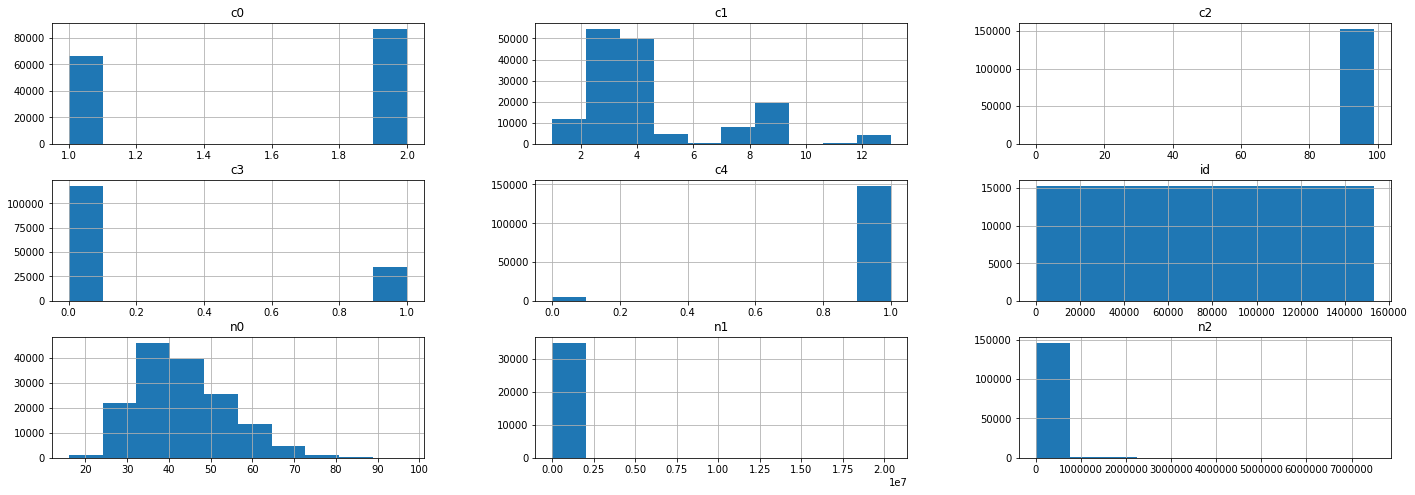

In [6]:
demo.hist(figsize=(24,8))

In [8]:
sample = txn.sample(100000)

In [23]:
sample.groupby(['id', 'old_cc_no', 'old_cc_label']).count()

c5  c6  c7  n3  n4  n5  n6  n7  t0
id     old_cc_no old_cc_label                                    
1      7051      0              6   6   6   6   6   6   6   6   6
       7052      0             19  19  19  19  19  19  19  19  19
2      126612    10            14  14  14  14  14  14  14  14  14
3      6404      10             2   2   2   2   2   2   2   2   2
       6405      10             5   5   5   5   5   5   5   5   5
       6406      0             10  10  10  10  10  10  10  10  10
4      266126    10             9   9   9   9   9   9   9   9   9
5      72072     7             19  19  19  19  19  19  19  19  19
6      122486    12            16  16  16  16  16  16  16  16  16
7      292175    0              9   9   9   9   9   9   9   9   9
8      289017    10            10  10  10  10  10  10  10  10  10
9      205237    12            12  12  12  12  12  12  12  12  12
10     2522      12             1   1   1   1   1   1   1   1   1
       2524      0             12  12  12  12  12  12  12  12  12
11     26826     12            14  14  14  14  14  14  14  14  14
12     12382     0              8   8   8   8   8   8   8   8   8
13     46042     10             1   1   1   1   1   1   1   1   1
       46043     10             2   2   2   2   2   2   2   2   2
       46045     12             3   3   3   3   3   3   3   3   3
       46046     12             1   1   1   1   1   1   1   1   1
       46048     6              1   1   1   1   1   1   1   1   1
       46049     8              1   1   1   1   1   1   1   1   1
14     15903     12             9   9   9   9   9   9   9   9   9
15     178171    12            11  11  11  11  11  11  11  11  11
16     292067    10             6   6   6   6   6   6   6   6   6
17     77423     12             2   2   2   2   2   2   2   2   2
       77424     0              2   2   2   2   2   2   2   2   2
       77425     0              3   3   3   3   3   3   3   3   3
18     4308      10            10  10  10  10  10  10  10  10  10
19     178717    10             2   2   2   2   2   2   2   2   2
...                            ..  ..  ..  ..  ..  ..  ..  ..  ..
153023 8446      11             1   1   1   1   1   1   1   1   1
153042 120945    10             1   1   1   1   1   1   1   1   1
153045 272010    10             1   1   1   1   1   1   1   1   1
153053 250752    10             1   1   1   1   1   1   1   1   1
153054 13924     9              1   1   1   1   1   1   1   1   1
153055 228035    10             1   1   1   1   1   1   1   1   1
153061 262776    12             1   1   1   1   1   1   1   1   1
153072 165816    10             1   1   1   1   1   1   1   1   1
153073 270053    10             1   1   1   1   1   1   1   1   1
153077 189638    10             1   1   1   1   1   1   1   1   1
153079 3576      10             1   1   1   1   1   1   1   1   1
153083 289888    10             1   1   1   1   1   1   1   1   1
153090 173982    10             1   1   1   1   1   1   1   1   1
153094 231355    7              1   1   1   1   1   1   1   1   1
153102 173058    8              1   1   1   1   1   1   1   1   1
153110 216453    10             1   1   1   1   1   1   1   1   1
153124 232495    10             1   1   1   1   1   1   1   1   1
153131 233381    10             1   1   1   1   1   1   1   1   1
153137 159292    10             1   1   1   1   1   1   1   1   1
153149 290650    10             1   1   1   1   1   1   1   1   1
153160 232447    10             2   2   2   2   2   2   2   2   2
153167 197673    10             1   1   1   1   1   1   1   1   1
153173 87666     3              1   1   1   1   1   1   1   1   1
153181 163648    12             1   1   1   1   1   1   1   1   1
153200 270866    0              1   1   1   1   1   1   1   1   1
153202 112304    10             1   1   1   1   1   1   1   1   1
153203 266145    10             1   1   1   1   1   1   1   1   1
153206 158747    10             1   1   1   1   1   1   1   1   1
15323

In [74]:
sample.groupby(['id','old_cc_no', 'n3']).count()

old_cc_label  c5  c6  c7  n4  n5  n6  n7  t0
id     old_cc_no n3                                               
1      7051      19              1   1   1   1   1   1   1   1   1
                 41              1   1   1   1   1   1   1   1   1
                 67              1   1   1   1   1   1   1   1   1
                 130             1   1   1   1   1   1   1   1   1
                 154             1   1   1   1   1   1   1   1   1
                 173             1   1   1   1   1   1   1   1   1
       7052      2               1   1   1   1   1   1   1   1   1
                 5               1   1   1   1   1   1   1   1   1
                 12              1   1   1   1   1   1   1   1   1
                 30              3   3   3   3   3   3   3   3   3
                 33              1   1   1   1   1   1   1   1   1
                 40              1   1   1   1   1   1   1   1   1
                 63              1   1   1   1   1   1   1   1   1
                 72              1   1   1   1   1   1   1   1   1
                 77              1   1   1   1   1   1   1   1   1
                 98              1   1   1   1   1   1   1   1   1
                 130             1   1   1   1   1   1   1   1   1
                 131             1   1   1   1   1   1   1   1   1
                 135             1   1   1   1   1   1   1   1   1
                 151             2   2   2   2   2   2   2   2   2
                 153             1   1   1   1   1   1   1   1   1
                 157             1   1   1   1   1   1   1   1   1
2      126612    58              1   1   1   1   1   1   1   1   1
                 105             1   1   1   1   1   1   1   1   1
                 138             1   1   1   1   1   1   1   1   1
                 174             1   1   1   1   1   1   1   1   1
                 194             1   1   1   1   1   1   1   1   1
                 238             1   1   1   1   1   1   1   1   1
                 243             1   1   1   1   1   1   1   1   1
                 258             1   1   1   1   1   1   1   1   1
...                            ...  ..  ..  ..  ..  ..  ..  ..  ..
153042 120945    363             1   1   1   1   1   1   1   1   1
153045 272010    338             1   1   1   1   1   1   1   1   1
153053 250752    295             1   1   1   1   1   1   1   1   1
153054 13924     265             1   1   1   1   1   1   1   1   1
153055 228035    105             1   1   1   1   1   1   1   1   1
153061 262776    193             1   1   1   1   1   1   1   1   1
153072 165816    132             1   1   1   1   1   1   1   1   1
153073 270053    300             1   1   1   1   1   1   1   1   1
153077 189638    106             1   1   1   1   1   1   1   1   1
153079 3576      315             1   1   1   1   1   1   1   1   1
153083 289888    180             1   1   1   1   1   1   1   1   1
153090 173982    44              1   1   1   1   1   1   1   1   1
153094 231355    174             1   1   1   1   1   1   1   1   1
153102 173058    9               1   1   1   1   1   1   1   1   1
153110 216453    72              1   1   1   1   1   1   1   1   1
153124 232495    217             1   1   1   1   1   1   1   1   1
153131 233381    3               1   1   1   1   1   1   1   1   1
153137 159292    30              1   1   1   1   1   1   1   1   1
153149 290650    47              1   1   1   1   1   1   1   1   1
153160 232447    112             1   1   1   1   1   1   1   1   1
                 340             1   1   1   1   1   1   1   1   1
153167 197673    38              1   1   1   1   1   1   1   1   1
153173 87666     42              1   1   1   1   1   1   1   1   1
153181 163648    86              1   1   1   1   1   1   1   1   1
153200 270866    234             1   1   1   1   1   1   1   1   1
153202 112304    133             1   1   1   1   1   1   1   1   1
153203 266145    65              1   1   1   1   1   1   1   1   1
15

In [13]:
sample.head(100)

,id,old_cc_no,old_cc_label,c5,c6,c7,n3,n4,n5,n6,n7,t0
4564620,3804,231807,10,15,-10,30,251,26000,113,0,391,8320203194880070299
9639563,51566,242959,10,11,-10,54,268,2100,109,900,2961,59748683408418518
10265249,36542,105344,12,12,10,58,239,1000,163,500,416,ON THE TABLEcC9tJEtCENTRAL EAST
4662154,9062,237606,10,99,0,48,287,300,155,0,3039,NETFLIXe0jjJaahCOM
10798253,5047,39692,4,31,9,53,112,300,106,700,558,AIRPAY he01Ath9MFOR SHOPEE)
9478282,131941,173104,10,41,-10,55,137,400,112,0,2894,8082965730635712858
7720269,6465,73627,12,11,-10,54,345,300,108,525,1412,7358886370202476005
12155683,90125,244484,10,12,9,48,237,1300,130,400,3901,AWNCMmjTTaFUTURE MART RAMA
9629436,23048,182598,12,21,0,41,156,400,119,600,4711,GRABTAXI jemHaCA000000000000
10438871,117329,1502,12,0,-10,63,176,53300,95,900,752,-5926018526426263082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e8fc550>,
      dtype=object)

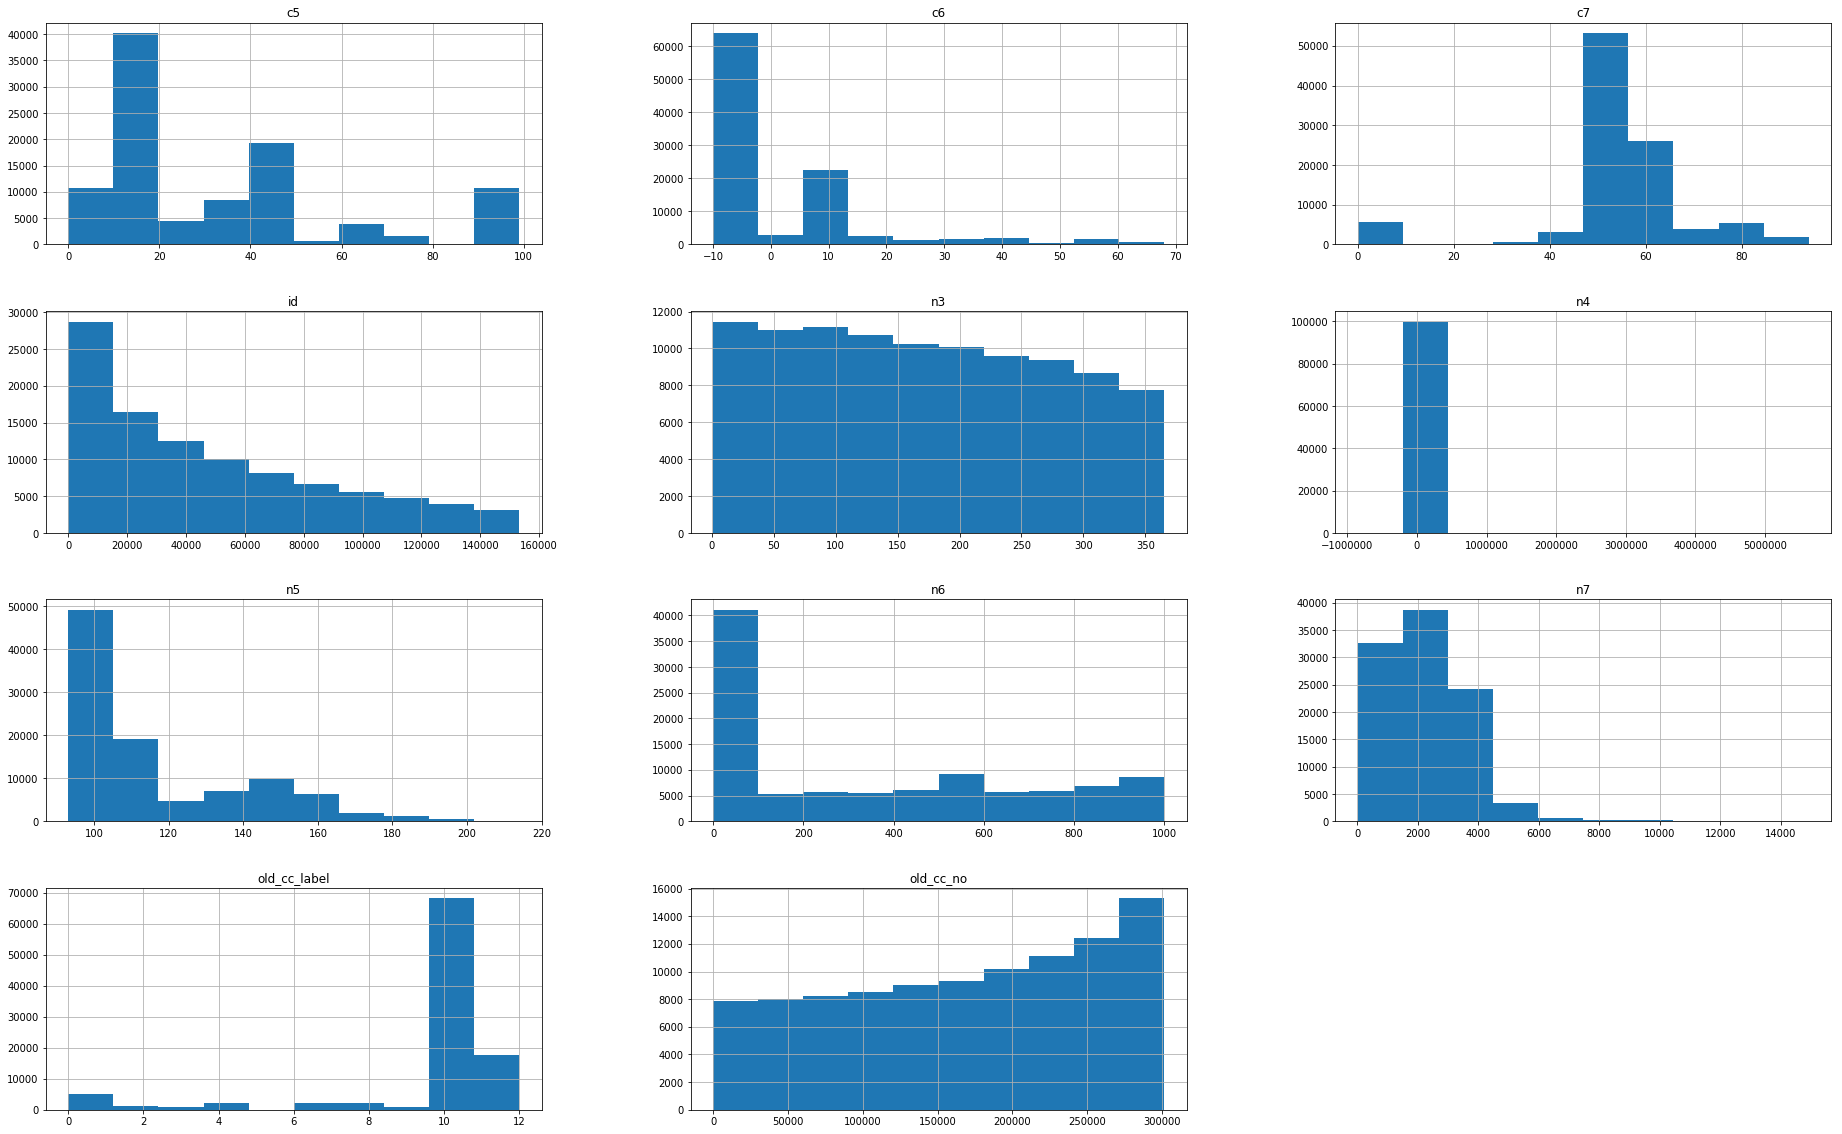

In [24]:
sample.hist(figsize=(32,20))

In [44]:
compare_old_label = pd.merge(sample, train_set, on='id' )[['old_cc_label', 'label']]